## Фамилия, Имя, Отчество автора

### Введение:
База данных содержит информацию о пересечении Америанско-Канадской и Американско-Мексиканской границ (только въезд на территорию США) за период с 1996-2019 гг.
Цель: провести разведочный анализ, проанализировать входящий в США поток людей и ТС, и штаты 

### Подготовка данных к анализу

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

#### Загрузка данных

In [33]:
dataset = pd.read_csv('Border_Crossing_Entry_Data.csv')
# Приведение формата даты к необходимому
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [34]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  346733 non-null  object        
 1   State      346733 non-null  object        
 2   Port Code  346733 non-null  int64         
 3   Border     346733 non-null  object        
 4   Date       346733 non-null  datetime64[ns]
 5   Measure    346733 non-null  object        
 6   Value      346733 non-null  int64         
 7   Location   346733 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 21.2+ MB


,Port Code,Value
count,346733.000000,3.467330e+05
mean,2455.504910,2.818767e+04
std,1201.208459,1.518588e+05
min,101.000000,0.000000e+00
25%,2304.000000,0.000000e+00
50%,3013.000000,9.000000e+01
75%,3402.000000,2.483000e+03
max,4105.000000,4.447374e+06


#### Проверка пропущенных значений в анализируемых данных

In [35]:
# Функция проверки пропущенных значений
def missing_values_table(df):
        # Общее количество отсутствующих значений
        mis_val = df.isnull().sum()
        
        # Процент пропущенных значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Составление таблицы с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Перименование столбцов
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортировка таблицы по проценту отсутствующих значений по убыванию
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Вывод результатов
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(dataset)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Пропущенных значений в анализируемых данных нет.

### Разведочный анализ. 
### 1. Наиболее часто пересекаемая граница

{'US-Mexico Border': 80546, 'US-Canada Border': 266187}
US-Canada Border : 266187


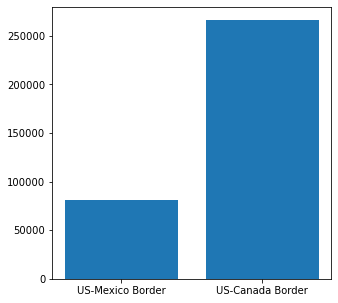

In [36]:
Border = dict(Counter(dataset['Border']))
print(Border)
plt.rcParams['figure.figsize'] = (5, 5)
plt.bar(Border.keys(), Border.values())
print(list(Border.keys())[list(Border.values()).index(max(Border.values()))],':',max(Border.values()) )

#### Наиболее часто пересекаемая граница: США - Канада

### 2. Наиболее частый способ пересечения границы


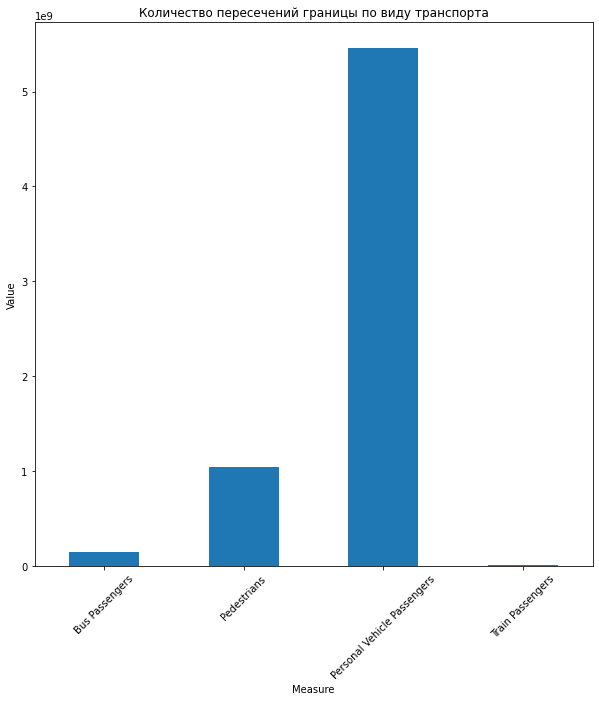

In [117]:
dataset2 = dataset.loc[(dataset['Measure']=='Train Passengers')|(dataset['Measure']=='Pedestrians')|(dataset['Measure']=='Bus Passengers')|(dataset['Measure']=='Personal Vehicle Passengers')|(dataset['Measure']=='Personal Vehicle')]
plt.figure(figsize=(10,10))
plt.title("Количество пересечений границы по виду транспорта")
plt.ylabel("Value")
dataset2.groupby('Measure')['Value'].sum().plot.bar(rot=45)

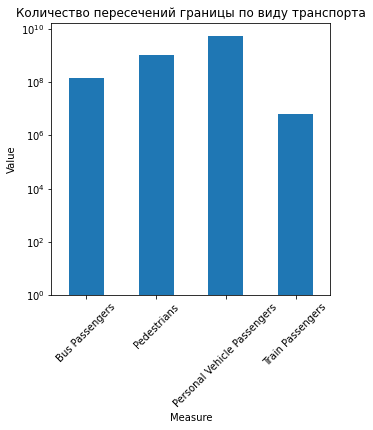

In [123]:
dataset2 = dataset.loc[(dataset.isin(['Train Passengers', 'Pedestrians', 'Bus Passengers', 'Personal Vehicle Passengers', 'Personal Vehicle' ])['Measure']==True)]
plt.title("Количество пересечений границы по виду транспорта")
plt.ylabel("Value")
dataset2.groupby('Measure')['Value'].sum().plot.bar(rot=45, log = True)

([<matplotlib.patches.Wedge at 0x268dd18fc40>,
 [Text(1.1474013914751413, 0.07726607820324238, 'Bus Passengers'),
  Text(0.930735897140233, 0.675448510083904, 'Pedestrians'),
  Text(-0.9758004887195448, -0.6085338168209697, 'Personal Vehicle Passengers'),
  Text(1.149995071661525, -0.0033667720748880373, 'Train Passengers')],
 [Text(0.6485312212685581, 0.04367213115835439, '2.1%'),
  Text(0.5260681157749142, 0.3817752448300327, '15.7%'),
  Text(-0.5515394066675687, -0.3439538964640263, '82.1%'),
  Text(0.6499972144173836, -0.0019029581292845427, '0.1%')])

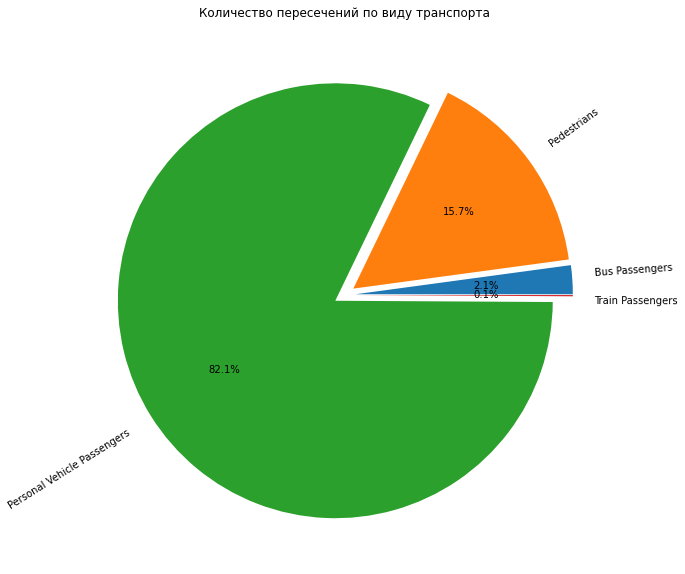

In [120]:
dataset3 = dataset2.groupby('Measure')['Value'].sum()
plt.figure(figsize=(10,10))
plt.title('Количество пересечений по виду транспорта')
plt.pie(dataset3, labels=dataset3.index, wedgeprops=dict(width=1),explode=(0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%', rotatelabels = True)


### 3. Вид транспортных средств, наиоблее часто пересекающий границу

{'Train Passengers': 27623, 'Rail Containers Full': 27657, 'Rail Containers Empty': 27684, 'Trains': 27708, 'Pedestrians': 28697, 'Bus Passengers': 28820, 'Buses': 28822, 'Truck Containers Full': 29694, 'Truck Containers Empty': 29757, 'Trucks': 29856, 'Personal Vehicle Passengers': 30196, 'Personal Vehicles': 30219}


<BarContainer object of 12 artists>

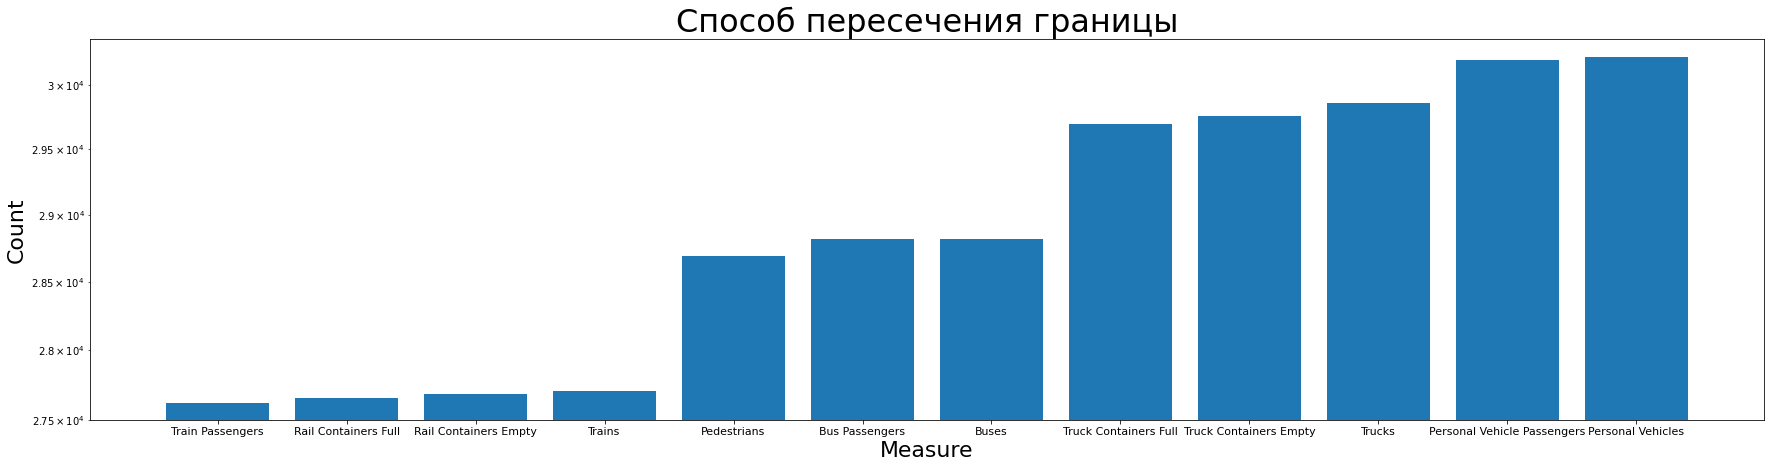

In [150]:
Measure = dict(Counter(dataset['Measure']))
#Отсортируем транспортные средства по увеличению популярности
list_measure = list(Measure.items())
list_measure.sort(key=lambda i: i[1])
Measure = dict(list_measure)
print(Measure)
plt.rcParams['figure.figsize'] = (30, 7)
plt.title("Способ пересечения границы", fontsize=32)
plt.xlabel("Measure", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.tick_params(labelsize=11)
plt.bar(Measure.keys(), Measure.values(), log=True)

#### Наиболее часто границу пересекает личный автотранспорт.

### 4. Анализ способа пересечения границ

In [130]:
#Отсортируем данные для различных границ
dataset1 = dataset.loc[dataset['Border']== 'US-Mexico Border']
dataset2 = dataset.loc[dataset['Border']== 'US-Canada Border']
Measure1 = dict(Counter(dataset1['Measure']))
Measure2 = dict(Counter(dataset2['Measure']))
#Наиболее популярный способ пересечения грациы США-Мексика
print(list(Measure1.keys())[list(Measure1.values()).index(max(Measure1.values()))],':', max(Measure1.values()) )
#Наиболее популярный способ пересечения грациы США-Канада
print(list(Measure2.keys())[list(Measure2.values()).index(max(Measure2.values()))],':', max(Measure2.values()) )

Pedestrians : 7034
Personal Vehicles : 23225


#### Данные для разных границ различаются. Наиболее популярный способ пересечения границ: США-Мексика - пешком, США-Канада - на личном автотранспорте 

### 5. Штаты, принимающие наибольшее количество трафика

{'Ohio': 5, 'New Mexico': 6438, 'Idaho': 6551, 'Michigan': 9985, 'Alaska': 11529, 'Vermont': 16247, 'California': 19102, 'Arizona': 19252, 'New York': 20697, 'Minnesota': 23135, 'Texas': 35754, 'Maine': 38136, 'Montana': 38154, 'Washington': 44677, 'North Dakota': 57071}


<BarContainer object of 15 artists>

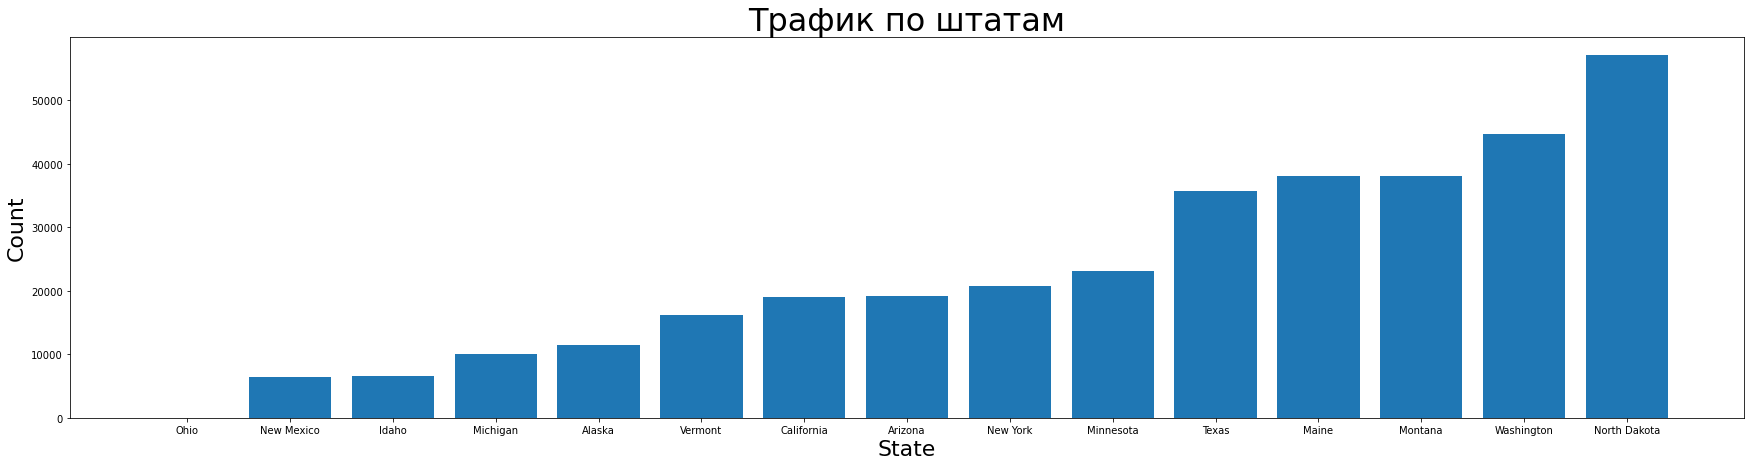

In [149]:
State = dict(Counter(dataset['State']))
#Отсортируем штаты по увеличению трафика
list_state = list(State.items())
list_state.sort(key=lambda i: i[1])
State = dict(list_state)
print(State)
plt.title("Трафик по штатам",fontsize=32 )
plt.xlabel("State", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.bar(State.keys(), State.values())

#### Наиболее заруженными являются штаты Северная Дакота, Вашингтон и Монтана

### 6. Анализ изменения трафика

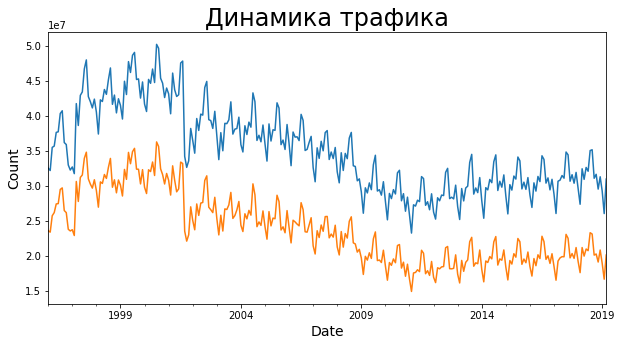

In [156]:
#Сортировка трафика пешеходов и пассажиров транспорта
dataset2 = dataset.loc[(dataset['Measure']=='Train Passengers')|(dataset['Measure']=='Pedestrians')|(dataset['Measure']=='Bus Passengers')|(dataset['Measure']=='Personal Vehicle Passengers')|(dataset['Measure']=='Personal Vehicle')]
plt.rcParams['figure.figsize'] = (10, 5)
plt.title("Динамика трафика",fontsize=24 )
plt.ylabel("Count", fontsize=14)
plt.xlabel("Date", fontsize=14)
dataset.groupby('Date')['Value'].sum().plot()
dataset2.groupby('Date')['Value'].sum().plot()

#### Как видно по рисунку, трафик имеет отрицательный тренд и за анализируемый период уменьшился.

### 7. Анализ сезонности

In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

[]

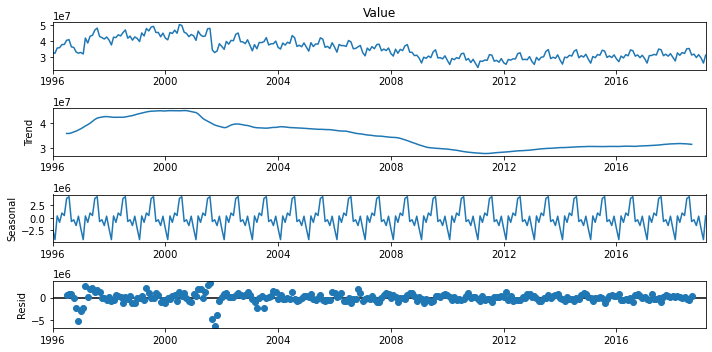

In [270]:
result = seasonal_decompose(dataset.groupby('Date')['Value'].sum(), model='additive')
result.plot()
plt.plot()

#### Рисунок Seasonal показывает наличие выраженной сезонности